In [7]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Wczytaj dane
data = pd.read_csv('platki_dane_zad4.csv', sep=';', header=0)

# Upewnij si?, ?e dane s? liczbowe
data[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'sod', 'blonnik', 'potas', 'kalorie']] = \
    data[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'sod', 'blonnik', 'potas', 'kalorie']].apply(pd.to_numeric, errors='coerce')

# Usu? brakuj?ce dane
data = data.dropna()
# usu? nade ktore cukry s? r?wne zero
print(data.info())
# Przygotuj dane wej?ciowe
X = data[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'sod', 'blonnik', 'potas']]
y = data[['kalorie']]

data


<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 0 to 76
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nazwa         72 non-null     object 
 1   producent     72 non-null     object 
 2   kalorie       72 non-null     int64  
 3   cukry         72 non-null     int64  
 4   weglowodany   72 non-null     float64
 5   proteiny      72 non-null     int64  
 6   tluszcz       72 non-null     int64  
 7   sod           72 non-null     int64  
 8   blonnik       72 non-null     float64
 9   potas         72 non-null     int64  
 10  Liczba_polek  72 non-null     int64  
 11  srodk_polka   72 non-null     object 
 12  polka_1       72 non-null     int64  
 13  polka_2       72 non-null     int64  
 14  polka_3       72 non-null     int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 9.0+ KB
None


,nazwa,producent,kalorie,cukry,weglowodany,proteiny,tluszcz,sod,blonnik,potas,Liczba_polek,srodk_polka,polka_1,polka_2,polka_3
0,100%_Bran,N,70,6,5.0,4,1,130,10.0,280,3,N,0,0,1
1,100%_Natural_Bran,Q,120,8,8.0,3,5,15,2.0,135,3,N,0,0,1
2,All-Bran,K,70,5,7.0,4,1,260,9.0,320,3,N,0,0,1
3,All-Bran_with_Extra_Fiber,K,50,0,8.0,4,0,140,14.0,330,3,N,0,0,1
4,Almond_Delight,R,110,8,14.0,2,2,200,1.0,1,3,N,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,110,3,21.0,2,1,250,0.0,60,3,N,0,0,1
73,Trix,G,110,12,13.0,1,1,140,0.0,25,2,T,0,1,0
74,Wheat_Chex,R,100,3,17.0,3,1,230,3.0,115,1,N,1,0,0
75,Wheaties,G,100,3,17.0,3,1,200,3.0,110,1,N,1,0,0


In [8]:
# podzia? danych na trzy zbiory UCZACY, WALIDACYJNY, TESTOWY

# Podzia? na zbi?r treningowy i testowy
X_train, X_walidacyjne, y_train, y_walidacyjne = train_test_split(X, y, test_size=0.5, random_state=42)

column_names = X_train.columns  # This sets column_names to the actual feature names


X_walidacyjne, X_test, y_walidacyjne, y_test = train_test_split(X_walidacyjne, y_walidacyjne, test_size=0.5, random_state=42)
print(column_names)



# PIERWSZY MODEL Z WSZYTSKIMI PARAMETRAMI LICZBOWYMI
# MODEL MA ZA ZADANIE PRZEWIDZIE? NA PODSTAWIE PARAMETR?W KALOWYCZNOSC
# Dodaj sta?? do modelu
X_train = sm.add_constant(X_train)
X_walidacyjne = sm.add_constant(X_walidacyjne)

# Dopasowanie modelu
wynik = sm.OLS(y_train, X_train).fit()
print(wynik.summary())

#korelacje paramrtow

print(data[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'sod', 'blonnik', 'potas', 'kalorie']].corr())



Index(['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'sod', 'blonnik',
       'potas'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                kalorie   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     101.4
Date:                Thu, 09 Jan 2025   Prob (F-statistic):           3.47e-18
Time:                        08:58:15   Log-Likelihood:                -103.73
No. Observations:                  36   AIC:                             223.5
Df Residuals:                      28   BIC:                             236.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [9]:
# odrzucamy potas
# X=sm.add_constant(X_train[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'sod', 'blonnik']])
# y=y_train['kalorie']
# wynik= sm.OLS(y, X).fit()
# print(wynik.summary())
# odrzucamy sod 0.635
# X=sm.add_constant(X_train[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'blonnik']])
# y=y_train['kalorie']
# wynik= sm.OLS(y, X).fit()
# print(wynik.summary())


# odrzucamy sta??
# X=X_train[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'blonnik']]
# y=y_train['kalorie']
# wynik= sm.OLS(y, X).fit()
# print(wynik.summary())

# odrzucamy blonnik 0.151
# wynik= sm.OLS(y_train, X_train[['cukry', 'weglowodany', 'proteiny', 'tluszcz']]).fit()
# print(wynik.summary())

# korelacje modelu
print(data[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'kalorie']].corr())
#
# Zostawiamy Kalorie cykry i t?uszcz

wynik= sm.OLS(y_train, X_train[['cukry', 'tluszcz']]).fit()
print(wynik.summary())




                cukry  weglowodany  proteiny   tluszcz   kalorie
cukry        1.000000    -0.460999 -0.302288  0.289176  0.565274
weglowodany -0.460999     1.000000 -0.018152 -0.276522  0.271385
proteiny    -0.302288    -0.018152  1.000000  0.185327  0.025989
tluszcz      0.289176    -0.276522  0.185327  1.000000  0.509224
kalorie      0.565274     0.271385  0.025989  0.509224  1.000000
                                 OLS Regression Results                                
Dep. Variable:                kalorie   R-squared (uncentered):                   0.776
Model:                            OLS   Adj. R-squared (uncentered):              0.763
Method:                 Least Squares   F-statistic:                              58.94
Date:                Thu, 09 Jan 2025   Prob (F-statistic):                    8.91e-12
Time:                        08:58:15   Log-Likelihood:                         -192.19
No. Observations:                  36   AIC:                                      

Rzeczywiste: 100
Predykcja: 65.6343786185221
--------------------------------
Rzeczywiste: 110
Predykcja: 29.134744901576198
--------------------------------
Rzeczywiste: 100
Predykcja: 46.211215350804636
--------------------------------
Rzeczywiste: 110
Predykcja: 119.21048278469644
--------------------------------
Rzeczywiste: 100
Predykcja: 67.98107143701114
--------------------------------
Rzeczywiste: 70
Predykcja: 75.34596025238083
--------------------------------
Rzeczywiste: 80
Predykcja: 0.0
--------------------------------
Rzeczywiste: 160
Predykcja: 160.4035021386204
--------------------------------
Rzeczywiste: 150
Predykcja: 158.05680932013138
--------------------------------
Rzeczywiste: 140
Predykcja: 102.13401233546801
--------------------------------
Rzeczywiste: 110
Predykcja: 106.82739797244606
--------------------------------
Rzeczywiste: 120
Predykcja: 90.07573788312024
--------------------------------
Rzeczywiste: 90
Predykcja: 75.34596025238083
------------------

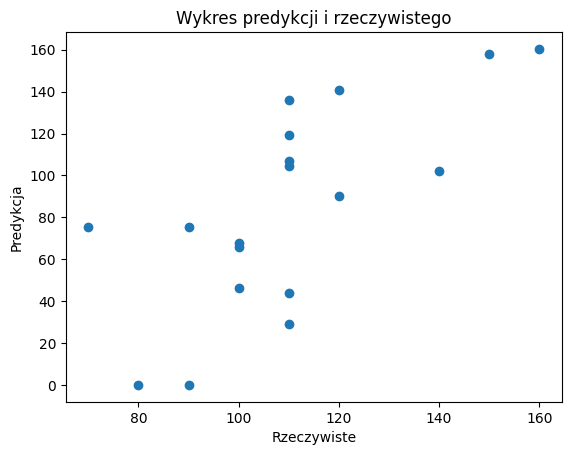

In [10]:
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error


# Define the calculation functions
def calculate_mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
def calculate_r2(y_true, y_pred):
    return r2_score(y_true, y_pred)
def calculate_me(y_true, y_pred):
    return np.mean(y_true - y_pred)
def calculate_mpe(y_true, y_pred):
    return np.mean((y_true - y_pred) / y_true)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / y_true)
def calculate_u2(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)
def calculate_um(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / np.sum(np.abs(y_true - np.mean(y_true)))
def calculate_ur(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / np.sum((np.abs(y_true) + np.abs(y_pred)) ** 2)
def calculate_ud(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / np.sum((np.abs(y_true) + np.abs(y_pred)) / 2)

y_walidacyjne_pred = wynik.predict(X_walidacyjne[['cukry', 'tluszcz']])

y_walidacyjne_1 = y_walidacyjne.squeeze()
y_walidacyjne_pred = y_walidacyjne_pred.squeeze()



for i in range(len(y_walidacyjne_pred)):
    # Safely fetch actual values
    rzeczywiste = y_walidacyjne.iloc[i, 0] if isinstance(y_walidacyjne, pd.DataFrame) else y_walidacyjne.iloc[i]
    print(f"Rzeczywiste: {rzeczywiste}")

    # Use .iloc for positional indexing on y_walidacyjne_pred
    predykcja = y_walidacyjne_pred.iloc[i]
    print(f"Predykcja: {predykcja}")
    print("--------------------------------")

# Predictions for validation data
# wypisac dane rzeczywiste i predykcyjne dla kazdego recordu


# Create a dictionary of metric functions
metrics = {
    "MAE": calculate_mae,
    "RMSE": calculate_rmse,
    "ME": calculate_me,
    "MPE": calculate_mpe,
    "MAPE": calculate_mape,
    "U2": calculate_u2,
    "UM": calculate_um,
    "UR": calculate_ur,
    "UD": calculate_ud
}

# Calculate each metric and store the result
results = {name: func(y_walidacyjne_1, y_walidacyjne_pred) for name, func in metrics.items()}

# Print the results
for name, value in results.items():
    print(f"{name}: {value}")


print(X_walidacyjne[['tluszcz', 'cukry']], y_walidacyjne_1 , y_walidacyjne_pred)

plt.scatter(y_walidacyjne_1, y_walidacyjne_pred)
plt.xlabel("Rzeczywiste")
plt.ylabel("Predykcja")
plt.title("Wykres predykcji i rzeczywistego")
plt.show()


Metryki ewaluacji na danych testowych:
MSE: 1809.46
RMSE: 42.54
MAE: 32.32
ME: nan
MPE: nan%
MAPE: nan%


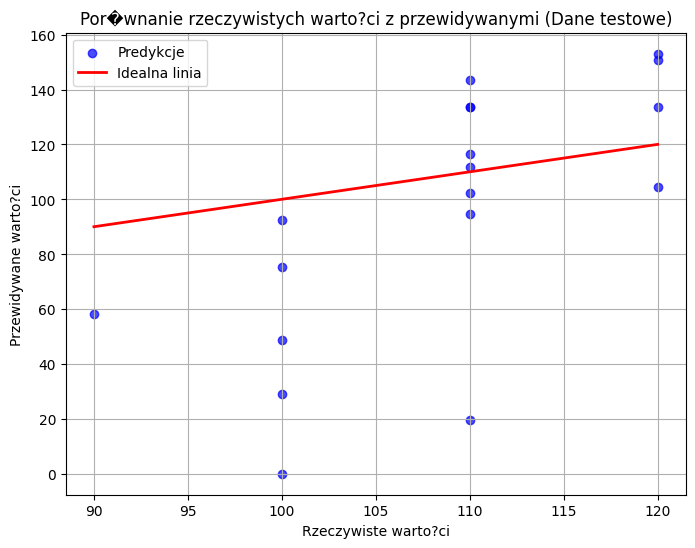

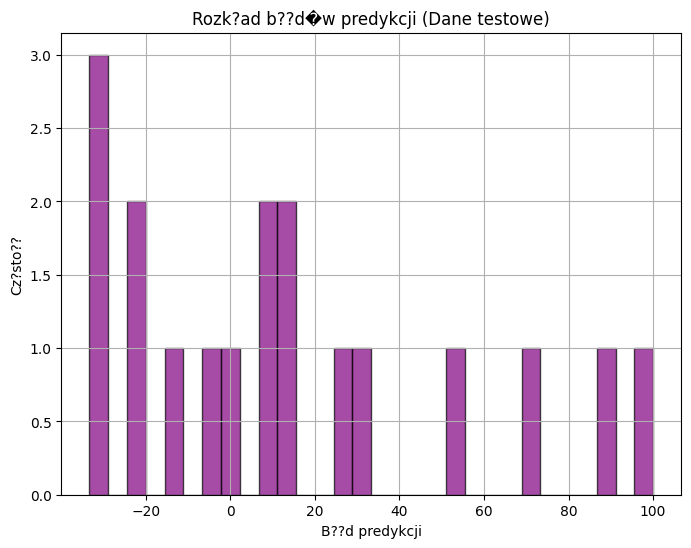


Rzeczywiste i przewidywane warto?ci:
Rzeczywiste: 110.00, Predykcja: 143.33, B??d: -33.33
Rzeczywiste: 100.00, Predykcja: 75.35, B??d: 24.65
Rzeczywiste: 90.00, Predykcja: 58.27, B??d: 31.73
Rzeczywiste: 110.00, Predykcja: 94.77, B??d: 15.23
Rzeczywiste: 110.00, Predykcja: 19.42, B??d: 90.58
Rzeczywiste: 100.00, Predykcja: 0.00, B??d: 100.00
Rzeczywiste: 110.00, Predykcja: 116.54, B??d: -6.54
Rzeczywiste: 120.00, Predykcja: 150.69, B??d: -30.69
Rzeczywiste: 110.00, Predykcja: 102.13, B??d: 7.87
Rzeczywiste: 120.00, Predykcja: 153.04, B??d: -33.04
Rzeczywiste: 120.00, Predykcja: 133.62, B??d: -13.62
Rzeczywiste: 110.00, Predykcja: 133.62, B??d: -23.62
Rzeczywiste: 110.00, Predykcja: 111.85, B??d: -1.85
Rzeczywiste: 110.00, Predykcja: 133.62, B??d: -23.62
Rzeczywiste: 120.00, Predykcja: 104.48, B??d: 15.52
Rzeczywiste: 100.00, Predykcja: 48.56, B??d: 51.44
Rzeczywiste: 100.00, Predykcja: 92.42, B??d: 7.58
Rzeczywiste: 100.00, Predykcja: 29.13, B??d: 70.87


In [11]:


# Predykcja na danych testowych
y_test_pred = wynik.predict(X_test[['cukry', 'tluszcz']])

# Obliczanie metryk
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Metryki b??d?w wzgl?dnych
me = calculate_me(y_test, y_test_pred)
mpe = calculate_mpe(y_test, y_test_pred)
mape = calculate_mape(y_test, y_test_pred)

# Wy?wietlenie wynik?w
print("Metryki ewaluacji na danych testowych:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"ME: {me:.2f}")
print(f"MPE: {mpe:.2%}")
print(f"MAPE: {mape:.2%}")

# Wykres rzeczywistych warto?ci vs przewidywane
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.7, label='Predykcje')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Idealna linia')
plt.xlabel("Rzeczywiste warto?ci")
plt.ylabel("Przewidywane warto?ci")
plt.title("Por?wnanie rzeczywistych warto?ci z przewidywanymi (Dane testowe)")
plt.legend()
plt.grid(True)
plt.show()

# Rozk?ad b??d?w
errors = y_test.squeeze() - y_test_pred
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30, edgecolor='black', color='purple', alpha=0.7)
plt.xlabel("B??d predykcji")
plt.ylabel("Cz?sto??")
plt.title("Rozk?ad b??d?w predykcji (Dane testowe)")
plt.grid(True)
plt.show()

# Wypisanie rzeczywistych i przewidywanych warto?ci dla ka?dego rekordu
print("\nRzeczywiste i przewidywane warto?ci:")
for i in range(len(y_test)):
    rzeczywiste = y_test.iloc[i, 0]
    predykcja = y_test_pred.iloc[i]
    print(f"Rzeczywiste: {rzeczywiste:.2f}, Predykcja: {predykcja:.2f}, B??d: {rzeczywiste - predykcja:.2f}")




In [12]:
#wartosci cukr?w ktrorych wartosc jest = 0
# mimo R^2 wi?kszyc niz 0.7
# patrz?c na model dostrzegamy
# wyra?ne rozbie?nosci b??d?w tj. zdarza si? ?e model dopaduje si? odpowiednio do
# danych a innym razem potrafi ca?kowicie zak?adma? obraz oraz ?le oddawa? zale?nosc
# zakrzywiaj? pogl?d na model

# Do zrobienia
# 1. Model potasu (blonnik)
# 2. model logitowy dwuga p??ka od kalorii(X)
# 3. propozycja klasyfikacja p?atek do producenta na podstawie sk?adnik?w (kalorie)

In [13]:
# 1. Model potasu (blonnik)
#
# X = data[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'sod', 'blonnik', 'kalorie']]
# y = data[['potas']]
#
# X = sm.add_constant(X)
# wynik = sm.OLS(y, X).fit()
# print(wynik.summary())


# # sod 0.973
# X= data[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'blonnik', 'kalorie']]
# y = data[['potas']]
#
# X = sm.add_constant(X)
# wynik = sm.OLS(y, X).fit()
# print(wynik.summary())


# kalorie 0.26
# X= data[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'blonnik']]
# y = data[['potas']]
#
# X = sm.add_constant(X)
# wynik = sm.OLS(y, X).fit()
# print(wynik.summary())

# korelacje
# corr= data[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'blonnik', 'potas']].corr()
# print(corr)

# # blonnik jest skorelowany ujemnie z weglowodany
# X= data[['cukry', 'proteiny', 'tluszcz', 'blonnik']]
# y = data[['potas']]
#
# X = sm.add_constant(X)
# wynik = sm.OLS(y, X).fit()
# print(wynik.summary())

# wypada sta?a
# blonnik jest skorelowany ujemnie z weglowodany
# X= data[['cukry', 'proteiny', 'tluszcz', 'blonnik']]
# y = data[['potas']]
#
# wynik = sm.OLS(y, X).fit()
# print(wynik.summary())

# corr= data[['cukry', 'proteiny', 'tluszcz', 'blonnik', 'potas']].corr()
# print(corr)

# proteiny bo s? najmocnej skorelowane z blonnikiem 0.51
X_train_1= X_train[['cukry',  'tluszcz', 'blonnik']]
y_train_1 = X_train[['potas']]

wynik = sm.OLS(y_train_1, X_train_1).fit()
print(wynik.summary())

corr= data[['cukry', 'tluszcz', 'blonnik', 'potas']].corr()
print(corr)

# predictions_validation_data


                                 OLS Regression Results                                
Dep. Variable:                  potas   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              201.9
Date:                Thu, 09 Jan 2025   Prob (F-statistic):                    2.68e-21
Time:                        08:58:16   Log-Likelihood:                         -171.79
No. Observations:                  36   AIC:                                      349.6
Df Residuals:                      33   BIC:                                      354.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

MAE na walidacyjnych danych:
18.679405112585144
RMSE na walidacyjnych danych:
22.93723605636434
MSE na walidacyjnych danych:
-7.010240533415025
ME na walidacyjnych danych:
-0.1269805262812312
MAPE na walidacyjnych danych:
0.257049187430953


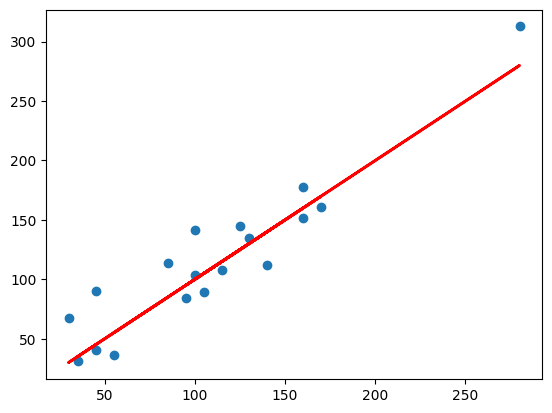

In [14]:
predykcje= wynik.predict(X_walidacyjne[['cukry', 'tluszcz', 'blonnik']])

print("MAE na walidacyjnych danych:")
print(calculate_mae(X_walidacyjne['potas'], predykcje))
print("RMSE na walidacyjnych danych:")
print(calculate_rmse(X_walidacyjne['potas'], predykcje))
print("MSE na walidacyjnych danych:")
print(calculate_me(X_walidacyjne['potas'], predykcje))
print("ME na walidacyjnych danych:")
print(calculate_mpe(X_walidacyjne['potas'], predykcje))
print("MAPE na walidacyjnych danych:")
print(calculate_mape(X_walidacyjne['potas'], predykcje))


plt.scatter(X_walidacyjne['potas'], predykcje)
#linia prosta X=Y
plt.plot(X_walidacyjne['potas'], X_walidacyjne['potas'], color='red', lw=2)



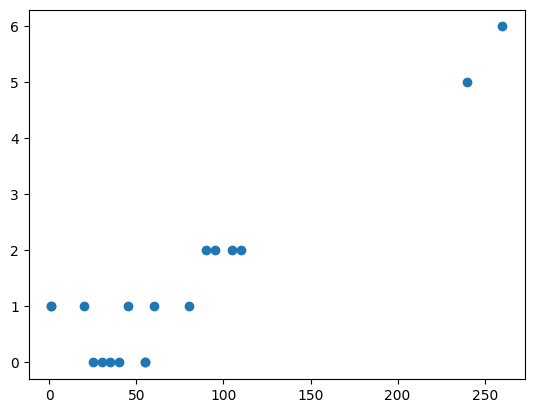

In [15]:
# TESTOWE
predict_test = wynik.predict(X_test[['cukry', 'tluszcz', 'blonnik']])

plt.scatter(X_test['potas'], X_test['blonnik'])


In [21]:
data2 = pd.read_csv('dane_platki_srednie.csv', sep=';', header=0)
data2


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 17: invalid start byte